In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

In [32]:
df = pd.read_csv(r"C:\Users\mjcanudo\Documents\Nova\ML\Project1\1st Project - Customer Segmentation-20240324\Digital_Contact.csv", sep=';')
df = df.set_index('Cust_ID')
df.describe()

,Email_Clicks,SM_Comments,App_Clicks,SM_Likes,SM_Shares,SM_Clicks
count,4000.00000,4000.000000,4000.000000,4000.000000,3961.000000,4000.000000
mean,25.76225,8.247750,19.526500,26.957000,8.355971,30.349250
std,23.65998,8.064963,34.237945,27.742658,8.696192,32.254974
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.00000,1.000000,2.000000,4.000000,1.000000,7.000000
50%,16.00000,4.000000,4.000000,11.000000,2.000000,15.000000
75%,36.00000,15.000000,7.000000,50.000000,16.000000,60.000000
max,86.00000,24.000000,127.000000,88.000000,26.000000,102.000000


In [3]:
df.isna().sum()

Email_Clicks     0
SM_Comments      0
App_Clicks       0
SM_Likes         0
SM_Shares       39
SM_Clicks        0
dtype: int64

In [4]:
print(df.SM_Shares.mean().round(2))
print(df.SM_Shares.median())

8.36
2.0


In [5]:
df["SM_Shares"] = df["SM_Shares"].fillna(df["SM_Shares"].median())

In [6]:
df.corr()

,Email_Clicks,SM_Comments,App_Clicks,SM_Likes,SM_Shares,SM_Clicks
Email_Clicks,1.000000,-0.600326,-0.144089,-0.531694,-0.570221,0.810447
SM_Comments,-0.600326,1.000000,-0.387786,0.754854,0.785246,-0.579699
App_Clicks,-0.144089,-0.387786,1.000000,-0.423025,-0.419863,-0.291367
SM_Likes,-0.531694,0.754854,-0.423025,1.000000,0.739660,-0.500684
SM_Shares,-0.570221,0.785246,-0.419863,0.739660,1.000000,-0.542596
SM_Clicks,0.810447,-0.579699,-0.291367,-0.500684,-0.542596,1.000000


In [7]:
df.kurt()

Email_Clicks    0.053571
SM_Comments    -1.171921
App_Clicks      1.900722
SM_Likes       -0.844043
SM_Shares      -1.099539
SM_Clicks      -0.696066
dtype: float64

<Axes: xlabel='App_Clicks'>

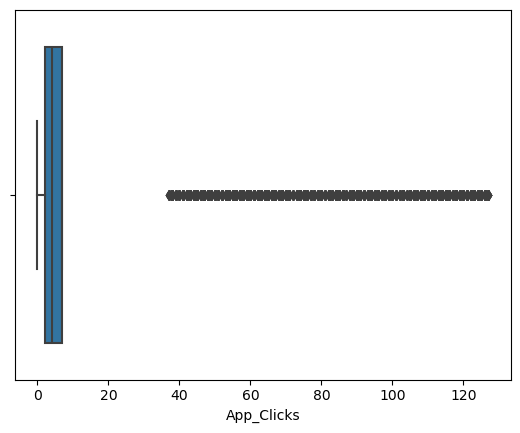

In [8]:
sns.boxplot(df, x='App_Clicks')

<Axes: xlabel='Email_Clicks'>

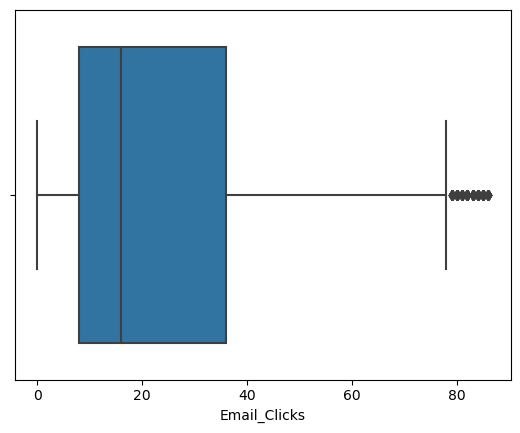

In [9]:
sns.boxplot(df, x='Email_Clicks')

In [10]:
df_sqrt = df.copy()
df_sqrt["Email_Clicks"] = np.sqrt(df_sqrt["Email_Clicks"])
df_sqrt["SM_Comments"] = np.sqrt(df_sqrt["SM_Comments"])
df_sqrt["App_Clicks"] = np.sqrt(df_sqrt["App_Clicks"])
df_sqrt["SM_Likes"] = np.sqrt(df_sqrt["SM_Likes"])
df_sqrt["SM_Shares"] = np.sqrt(df_sqrt["SM_Shares"])
df_sqrt["SM_Clicks"] = np.sqrt(df_sqrt["SM_Clicks"])

c:\Users\mjcanudo\AppData\Local\miniconda3\envs\conda_nova\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Email_Clicks', ylabel='Count'>

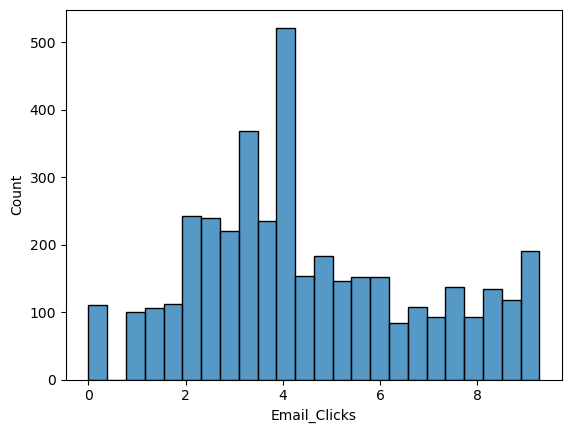

In [11]:
sns.histplot(df_sqrt, x="Email_Clicks")

In [12]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_sqrt)

In [13]:
pca_model = PCA(n_components=2)
reduced_dim = pca_model.fit_transform(df_scaled)

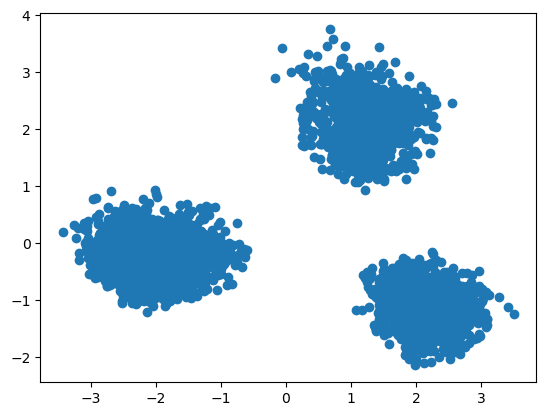

In [14]:
plt.scatter(reduced_dim[:,0], reduced_dim[:,1])

In [15]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
        init='k-means++',
        n_init=10,
        max_iter=300,
        random_state=0)
    km.fit(reduced_dim)
    distortions.append(km.inertia_)

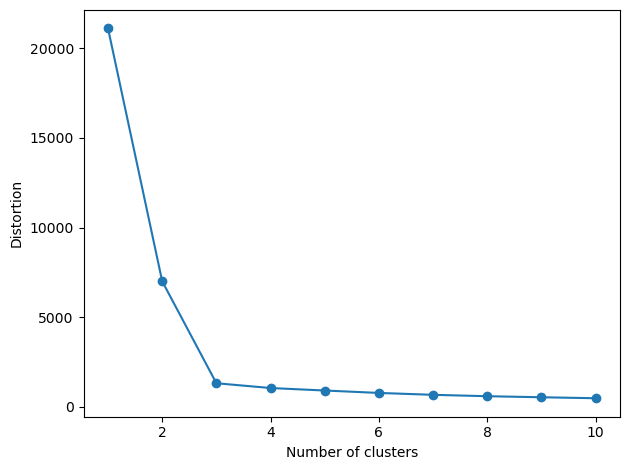

In [16]:
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [18]:
km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300)

In [19]:
clustered = km.fit_predict(reduced_dim)

In [20]:
df_clustered = pd.DataFrame(reduced_dim, index=df_sqrt.index)
df_clustered["cluster"] = km.labels_

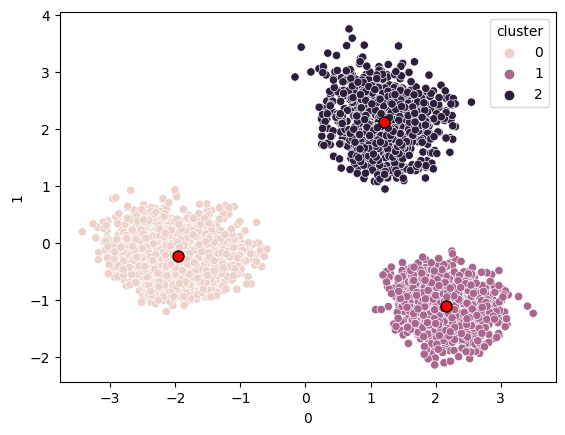

In [21]:
sns.scatterplot(df_clustered, x=df_clustered[0], y=df_clustered[1], hue='cluster')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='.',
            c='red', edgecolor='black',
            label='Centroids')

In [24]:
from sklearn.metrics import silhouette_score
sil_score =  silhouette_score(df_scaled, km.labels_)
sil_score

0.6361050248406602

In [27]:
df_clustered

,0,1,cluster
Cust_ID,,,
4,2.211223,-1.099684,1
5,-1.626596,-0.605628,0
6,-1.862614,-0.306888,0
9,3.006605,-1.361822,1
10,2.085947,-0.820189,1
...,...,...,...
6489,-2.249586,-0.768913,0
6491,-1.472748,-0.251257,0
6492,1.664589,-0.660031,1


In [33]:
df = df.merge(df_clustered["cluster"], how='left', left_index=True, right_index=True)

In [34]:
df

,Email_Clicks,SM_Comments,App_Clicks,SM_Likes,SM_Shares,SM_Clicks,cluster
Cust_ID,,,,,,,
4,72,1,7,7,1.0,73,1
5,15,20,1,35,15.0,16,0
6,9,7,3,73,19.0,10,0
9,67,0,2,0,1.0,101,1
10,38,0,1,9,0.0,56,1
...,...,...,...,...,...,...,...
6489,13,14,1,83,22.0,13,0
6491,17,13,2,22,21.0,7,0
6492,34,1,2,1,2.0,53,1


In [35]:
df.cluster.unique()

array([1, 0, 2])

In [36]:
df0 = df.query(' cluster == 0 ')
df0 = df.query(' cluster == 0 ')
df0 = df.query(' cluster == 0 ')

In [38]:
df0.describe()

,Email_Clicks,SM_Comments,App_Clicks,SM_Likes,SM_Shares,SM_Clicks,cluster
count,1903.000000,1903.000000,1903.000000,1903.000000,1885.000000,1903.000000,1903.0
mean,9.682081,15.781923,2.483973,51.545455,16.457294,9.521282,0.0
std,5.663851,5.178136,1.710557,21.274826,5.737157,5.775273,0.0
min,0.000000,7.000000,0.000000,15.000000,7.000000,0.000000,0.0
25%,5.000000,11.000000,1.000000,33.000000,12.000000,5.000000,0.0
50%,10.000000,16.000000,3.000000,52.000000,16.000000,9.000000,0.0
75%,15.000000,20.000000,4.000000,70.000000,21.000000,15.000000,0.0
max,19.000000,24.000000,5.000000,88.000000,26.000000,19.000000,0.0
